# Histogram equalization

Histogram equalization is a technique used in image processing to improve the contrast and enhance the overall appearance of an image. It redistributes the intensity values of the pixels in an image (across 0 to L-1) to make better use of the available dynamic range. Here's why a picture may appear clearer after histogram equalization:

**Improved Contrast:** Histogram equalization spreads out the intensity values across the entire dynamic range of the image. This means that areas of the image that were previously too dark or too bright may now have a wider range of intensity values, leading to improved contrast. As a result, details that were previously difficult to distinguish due to poor contrast become more pronounced and easier to see.

**Enhanced Visibility of Features:** Histogram equalization enhances the visibility of features in the image by making subtle differences in intensity more apparent. This can help bring out details that were previously hidden in shadowed or overexposed regions of the image.




In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Define the path to the image
#image_path = '/content/drive/MyDrive/FELV-cat.jpg'
image_path = '/content/drive/MyDrive/seeds.jpg'

In [27]:
# Read the image
image = cv2.imread(image_path)

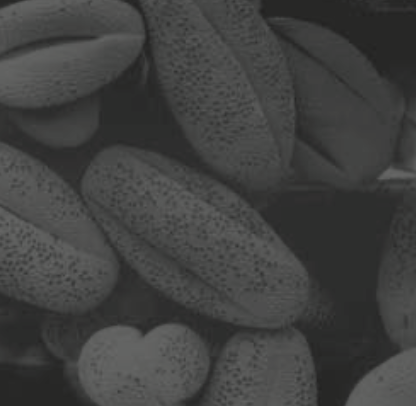

In [50]:
# Check if the image is loaded successfully
cv2_imshow(image)

In [51]:
# Get the dimensions of the image
height, width, channels = image.shape

# Print the size of the image
print("Image width:", width)
print("Image height:", height)
print("Number of channels:", channels)

Image width: 416
Image height: 406
Number of channels: 3


# Convert to Grayscale

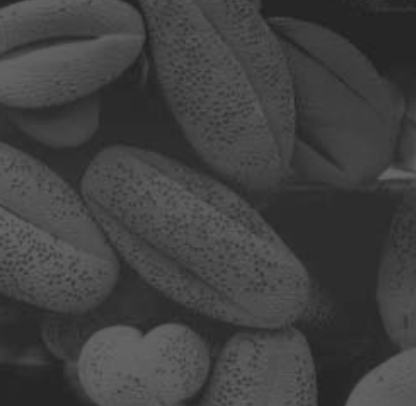

In [52]:
import numpy as np
# Convert to grayscale manually (weighted sum of R, G, B channels)
gray_image = np.dot(image[:, :, :], [0.3, 0.6, 0.1]).astype(np.uint8)
cv2_imshow(gray_image)

In [53]:
# Get the dimensions of the grayscale image
height, width= gray_image.shape

# Print the size of the image
print("Image width:", width)
print("Image height:", height)


Image width: 416
Image height: 406


# Calculate histogram of image

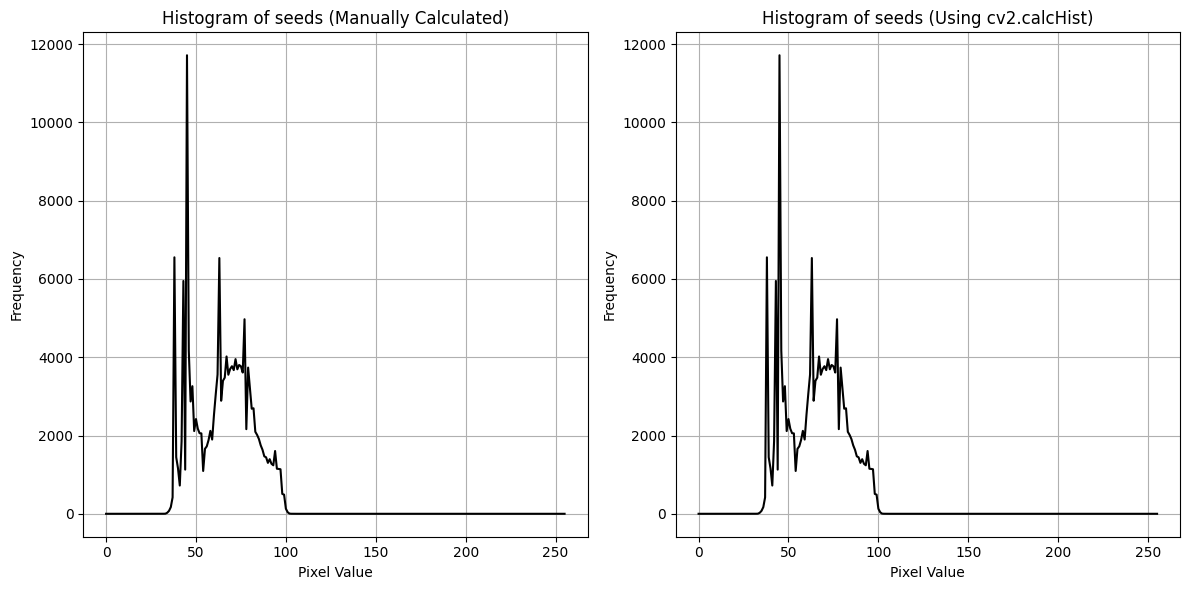

In [54]:
import matplotlib.pyplot as plt

# Initialize histogram bins
hist_bins_manual = np.zeros(256)

# Calculate histogram manually
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        pixel_value = gray_image[i, j]
        hist_bins_manual[pixel_value] += 1

# Calculate histogram using inbuilt function
hist_bins_inbuilt = cv2.calcHist([gray_image], [0], None, [256], [0,256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_bins_manual, color='black')
plt.title('Histogram of seeds (Manually Calculated)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_bins_inbuilt, color='black')
plt.title('Histogram of seeds (Using cv2.calcHist)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


example of counter which will be used to get counts of intensity levels - intensity level: count

In [55]:
from collections import Counter

# Extract intensity levels from the image
c = [1,1,2,2,2,2,3,3,3,4,5,5,6,6,6,6,7,8]

# Count the occurrences of each intensity level
counts = Counter(c)
counts

Counter({1: 2, 2: 4, 3: 3, 4: 1, 5: 2, 6: 4, 7: 1, 8: 1})

# Histogram equalization

Histogram equalization is a technique used in image processing to improve the contrast and enhance the overall appearance of an image. It redistributes the intensity values of the pixels in an image to make better use of the available dynamic range. Here's why a picture may appear clearer after histogram equalization:

**Improved Contrast:** Histogram equalization spreads out the intensity values across the entire dynamic range of the image. This means that areas of the image that were previously too dark or too bright may now have a wider range of intensity values, leading to improved contrast. As a result, details that were previously difficult to distinguish due to poor contrast become more pronounced and easier to see.

**Enhanced Visibility of Features:** Histogram equalization enhances the visibility of features in the image by making subtle differences in intensity more apparent. This can help bring out details that were previously hidden in shadowed or overexposed regions of the image.




Here are the general steps involved in histogram equalization:

**Compute Histogram:** Calculate the histogram of the input grayscale image. The histogram represents the frequency distribution of intensity values in the image.

**Normalize Histogram:** Normalize the histogram by dividing each bin value by the total number of pixels in the image. This step transforms the histogram into a probability distribution function (PDF).

**Compute Cumulative Distribution Function (CDF):** Calculate the cumulative distribution function (CDF) of the normalized histogram. The CDF represents the cumulative sum of probabilities up to each intensity level.

**Histogram Equalization Transformation: **Apply the histogram equalization transformation to each pixel in the image. For each pixel intensity value, map it to a new intensity value using the formula:

**Adjust Pixel Intensities:** Apply the new intensity values obtained from the histogram equalization transformation to the corresponding pixels in the image.

**Output Equalized Image:** The resulting image after histogram equalization will have enhanced contrast, with a more uniform distribution of intensity values across the entire range.

Assuming initially continuous intensity values, let the variable r denote the intensities of an image to be processed. As usual, we assume that r is in the range [0, L − 1], with r = 0 representing black and r = L − 1 representing white. For r satisfying these conditions, we focus attention on transformations (intensity mappings) of the form
s = T(r) 0 ≤ r ≤ L − 1

We assume that
T(r) is a monotonic† increasing function in the interval 0 ≤ r ≤ L − 1; and
0≤T(r)≤L−1for0≤r≤L−1

# Compute Histogram:

In [56]:
from collections import Counter
import pandas as pd

# Extract intensity levels from the image
intensity_levels = gray_image.flatten().tolist()

# Count the occurrences of each intensity level
intensity_counts = Counter(intensity_levels)

# Create a DataFrame with intensity levels and their counts
df = pd.DataFrame(intensity_counts.items(), columns=['Intensity Level (r)', 'Count (n)'])

# Print the DataFrame
df = df.sort_values(by='Intensity Level (r)', ascending=True)
df

,Intensity Level (r),Count (n)
67,32,1
66,33,3
65,34,26
63,35,75
62,36,171
...,...,...
64,99,489
68,100,129
69,101,40
70,102,5


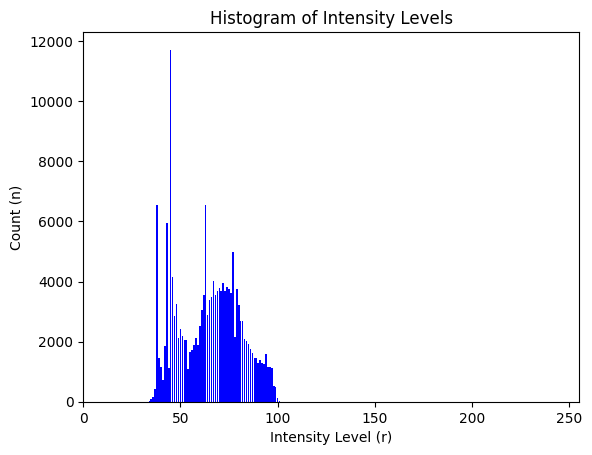

In [57]:
# Assuming df contains the data for intensity levels and their counts
plt.bar(df['Intensity Level (r)'], df['Count (n)'], color='blue')
plt.title('Histogram of Intensity Levels')
plt.xlabel('Intensity Level (r)')
plt.ylabel('Count (n)')

# Set x-axis limits from 0 to 255
plt.xlim(0, 255)

plt.show()


Notice histogram is on the dark side of intensity levels

# Normalize Histogram /Compute Cumulative Distribution Function (CDF)/Adjust Pixel Intensities

In [58]:
# r is in range [0,255]
L = 256

# Get the dimensions of the image
M, N = gray_image.shape

# Print the size of the image
print("Image height:", M)
print("Image width:", N)

Image height: 406
Image width: 416


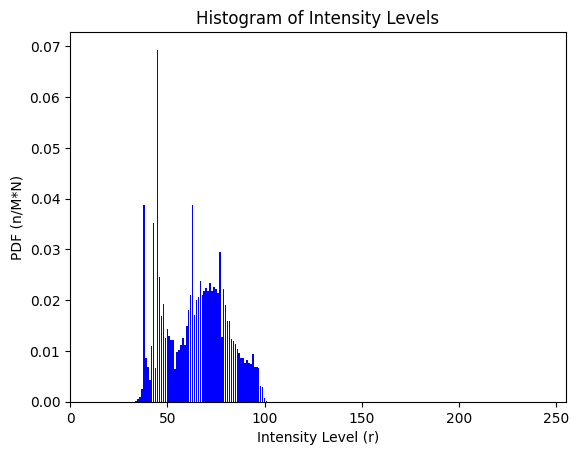

In [59]:
# Calculate total intensity
normalization_factor = M * N

# Calculate intensity probabilities (PDF)
df['PDF (n/M*N)'] = df['Count (n)'] / normalization_factor

# normalized histogram
plt.bar(df['Intensity Level (r)'], df['PDF (n/M*N)'], color='blue')
plt.title('Histogram of Intensity Levels')
plt.xlabel('Intensity Level (r)')
plt.ylabel('PDF (n/M*N)')

# Set x-axis limits from 0 to 255
plt.xlim(0, 255)

plt.show()

In [60]:
# Calculate cumulative probabilities (CDF)
df['CDF'] = df['PDF (n/M*N)'].cumsum()

# Histogram Equalization level s = T(r)
df['HistEqLevel T(r)'] = round(df['CDF'] * (L-1)).astype(int)

# Display the table
df

,Intensity Level (r),Count (n),PDF (n/M*N),CDF,HistEqLevel T(r)
67,32,1,0.000006,0.000006,0
66,33,3,0.000018,0.000024,0
65,34,26,0.000154,0.000178,0
63,35,75,0.000444,0.000622,0
62,36,171,0.001012,0.001634,0
...,...,...,...,...,...
64,99,489,0.002895,0.998964,255
68,100,129,0.000764,0.999728,255
69,101,40,0.000237,0.999964,255
70,102,5,0.000030,0.999994,255


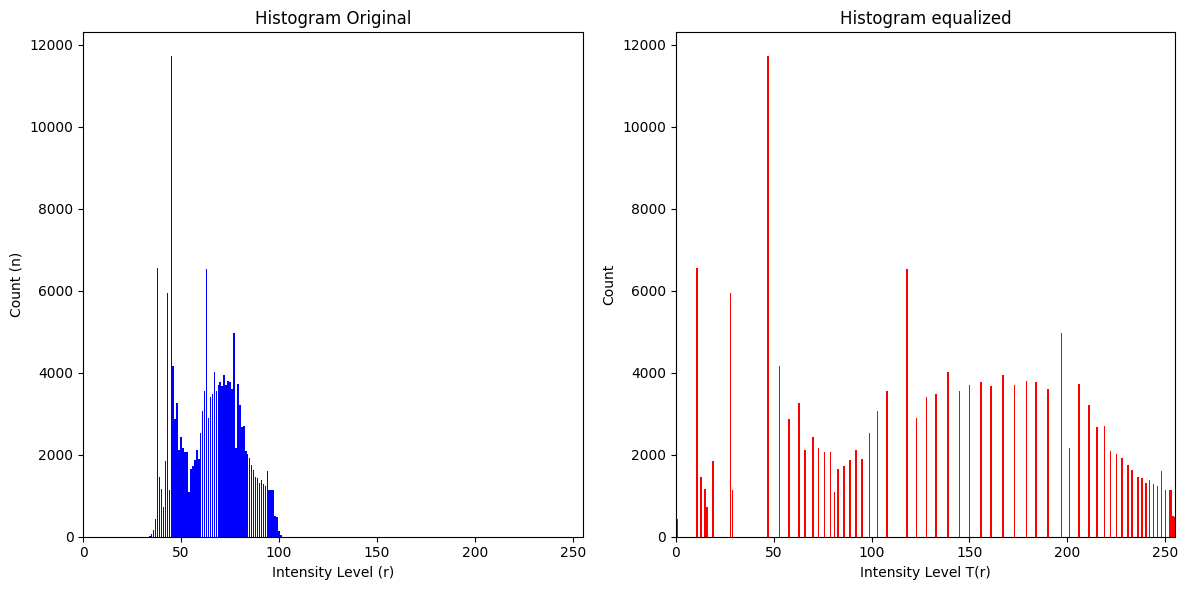

In [61]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(df['Intensity Level (r)'], df['Count (n)'], color='blue')
plt.title('Histogram Original')
plt.xlabel('Intensity Level (r)')
plt.ylabel('Count (n)')
plt.xlim(0, 255)


plt.subplot(1, 2, 2)
plt.bar(df['HistEqLevel T(r)'], df['Count (n)'], color='red')
plt.title('Histogram equalized')
plt.xlabel('Intensity Level T(r)')
plt.ylabel('Count')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

# Output Equalized Image - Back projection:

The back projection (or "project") of a histogrammed image is the re-application of the modified histogram to the original image, functioning as a look-up table for pixel brightness values.

In [62]:
# Create a dictionary to map values from Intensity Level (r) to HistEqLevel T(r)
mapping = {key: value for key, value in zip(df['Intensity Level (r)'], df['HistEqLevel T(r)'] )}
print(mapping)

{32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 1, 38: 11, 39: 13, 40: 15, 41: 16, 42: 19, 43: 28, 44: 29, 45: 47, 46: 53, 47: 58, 48: 63, 49: 66, 50: 70, 51: 73, 52: 76, 53: 79, 54: 81, 55: 83, 56: 86, 57: 89, 58: 92, 59: 95, 60: 99, 61: 103, 62: 108, 63: 118, 64: 123, 65: 128, 66: 133, 67: 139, 68: 145, 69: 150, 70: 156, 71: 161, 72: 167, 73: 173, 74: 179, 75: 184, 76: 190, 77: 197, 78: 201, 79: 206, 80: 211, 81: 215, 82: 219, 83: 222, 84: 225, 85: 228, 86: 231, 87: 233, 88: 236, 89: 238, 90: 240, 91: 242, 92: 244, 93: 246, 94: 248, 95: 250, 96: 252, 97: 253, 98: 254, 99: 255, 100: 255, 101: 255, 102: 255, 103: 255}


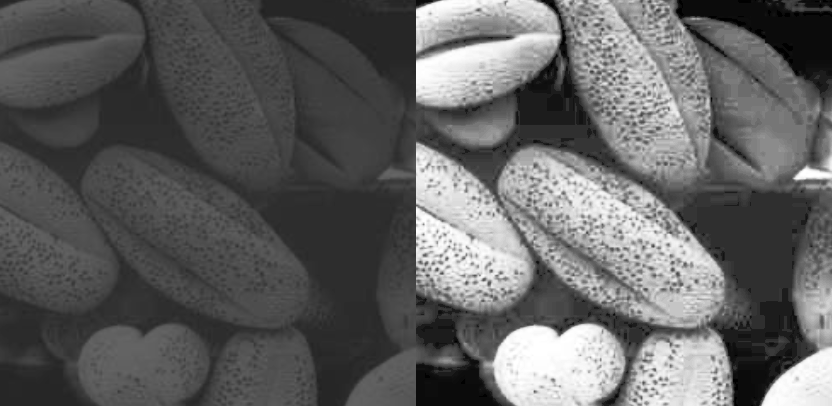

In [63]:
# Replace values in lst1 with corresponding values from the mapping dictionary
intensity_levels_new = [mapping[val] if val in mapping else val for val in intensity_levels]

# Reshape the intensity levels array to match the original image shape for equalized data
reconstructed_original_image  = np.array(intensity_levels_new).reshape(gray_image.shape)

# Convert the reconstructed image back to uint8 data type
reconstructed_original_image = np.uint8(reconstructed_original_image)

# Display original image and equalized image
image_stack= np.hstack((gray_image,reconstructed_original_image))

cv2_imshow(image_stack)

We notice above image  improved contrast and visibility of features after histogram equalization

The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are either over or under-exposed.

Histogram equalization often produces unrealistic effects in photographs; however it is very useful for scientific images like thermal, satellite or x-ray images, often the same class of images to which one would apply false-color. Also histogram equalization can produce undesirable effects (like visible image gradient) when applied to images with low color depth.

# Function T(r)

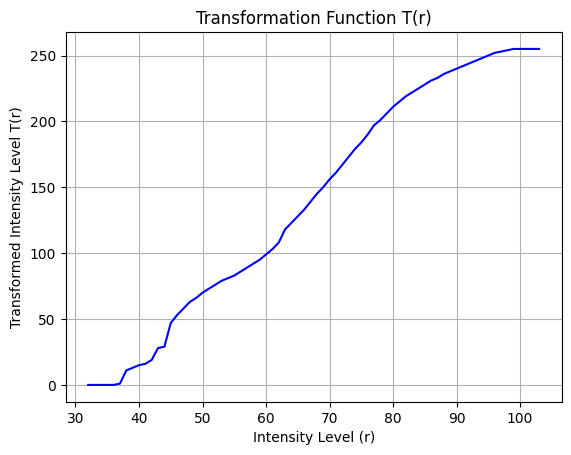

In [64]:
# Extract keys (intensity levels) and values (transformed intensity levels) from the mapping dictionary
intensity_levels = list(mapping.keys())
transformed_levels = list(mapping.values())

# Plot the graph
plt.plot(intensity_levels, transformed_levels, color='blue')
plt.title('Transformation Function T(r)')
plt.xlabel('Intensity Level (r)')
plt.ylabel('Transformed Intensity Level T(r)')
plt.grid(True)
plt.show()


We see that T(r) is monotonically increasing but not single valued. observe the extremes r=0 and r=255. Illustrated below

In [65]:
# Initialize an empty dictionary to store keys mapping to the same value
many_keys_to_one_value = {}

# Iterate over the key-value pairs in the mapping dictionary
for key, value in mapping.items():
    # Check if the value is already in the many_keys_to_one_value dictionary
    if value in many_keys_to_one_value:
        # Append the key to the list of keys for the corresponding value
        many_keys_to_one_value[value].append(key)
    else:
        # Create a new list with the key as the only element for the new value
        many_keys_to_one_value[value] = [key]

# Filter the dictionary to keep only the entries where there are multiple keys for the same value
many_keys_to_one_value = {value: keys for value, keys in many_keys_to_one_value.items() if len(keys) > 1}

# Print the keys mapping to the same value
print(many_keys_to_one_value)


{0: [32, 33, 34, 35, 36], 255: [99, 100, 101, 102, 103]}
